In [5]:
## 이번 장에 필요한 패키지들을 먼저 불러들임

import pandas as pd
import numpy as np
import os                               ## chdir 함수 사용위해서
import matplotlib.pyplot as plt         ## 그림 그리기 위해서
from lifelines import WeibullAFTFitter  ## 와이블 AFT 모형을 적합하기 위해

In [7]:
## 디렉토리 설정
os.chdir("/Users/skang-mbpro15-18/Dropbox/Sangwook/Teaching/YS-Naver/Survival/Data")
pbc = pd.read_csv("pbc_comp.csv")  ## pbc 자료 불러들이기

In [8]:
## 와이블 분포를 가정하여 AFT 모형을 적합함
## PBC 자료를 이용하고 treat 효과를 sex, age, edema와 bili 변수의 효과를 
## 감안하여 추정하려 함 

aft = WeibullAFTFitter()  ## 와이블 AFT 모형 적합 결과를 aft에 저장하도록 지정

## aft.fit에서 (사용할 자료, 생존시간, 절단 여부, 식)의 형태로 값을 입력
## formula 옵션: 사용할 설명 변수를 +의 형태로 붙여 넣어준다.
aft.fit(pbc, duration_col="futime", event_col="delta", formula="treat+sex+age+edema+bili")
aft.print_summary(3)  ## 결과 출력. (3)은 소숫점 3째 자리까지

<lifelines.WeibullAFTFitter: fitted with 312 total observations, 187 right-censored observations>
             duration col = 'futime'
                event col = 'delta'
   number of observations = 312
number of events observed = 125
           log-likelihood = -1121.024
         time fit was run = 2021-02-26 09:02:37 UTC

---
                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param   covariate                                                                                                         
lambda_ Intercept  9.547  13999.702      0.474            8.618           10.475             5531.975            35428.880
        treat      0.035      1.036      0.130           -0.220            0.290                0.803                1.336
        sex        0.391      1.479      0.169            0.060            0.723                1.062                2.060
        age       -0.024      0.976      0.006           -0.036           -0.012                0.964                0.989
        edema     -1.180      0.307      0.204           -1.580           -0.780                0.206                0.459
        bili      -0.086      0.917      0.010           -0.105           -0.068                0.900                0.935
rho_    Intercept  0.372      1.450      0.074            0.227            0.516                1.255                1.675

                       z       p   -log2(p)
param   covariate                          
lambda_ Intercept 20.152 <0.0005    297.617
        treat      0.269   0.788      0.344
        sex        2.314   0.021      5.596
        age       -3.777 <0.0005     12.624
        edema     -5.777 <0.0005     26.969
        bili      -8.953 <0.0005     61.326
rho_    Intercept  5.053 <0.0005     21.134
---
Concordance = 0.799
AIC = 2256.048
log-likelihood ratio test = 135.458 on 5 df
-log2(p) of ll-ratio test = 88.969

In [9]:
print(aft.median_survival_time_)  ## 중위수 추정치 출력
print(aft.mean_survival_time_)    ## 평균 추정치 출력

4487.849266523742
5239.332247938634


<AxesSubplot:xlabel='log(accelerated failure rate) (95% CI)'>

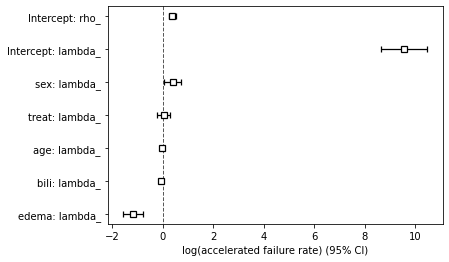

In [7]:
aft.plot()  ## 회귀 계수의 95% 신뢰구간 출력

Text(0.5, 1.0, 'Survival functions: female vs. male')

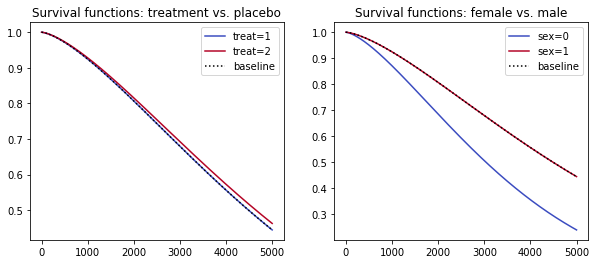

In [10]:
## 한 줄에 두 개의 plot을 그림
## 각 plot의 사이즈는 10 x 4 인치로
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))  

times = np.arange(0, 5000)  ## 0부터 4999까지 값을 가지는 배열 생성 (시간으로 사용)

## 0부터 4999까지의 시간에 대한 생존 함수를 와이블 AFT 모형을 가정하고 추정
wft_fit = WeibullAFTFitter().fit(pbc, "futime", "delta", 
                                 formula="treat+sex+age+edema+bili", timeline=times)

## 처리와 위약군의 생존 함수를 비교하는 plot 생성
## ax[0]: 2개의 subplot중 첫 번째를 의미
#wft_fit.plot_partial_effects_on_outcome("treat", range(0,2), cmap='coolwarm', ax=ax[0])
wft_fit.plot_partial_effects_on_outcome("treat", values=[1,2], cmap='coolwarm', ax=ax[0])
ax[0].set_title("Survival functions: treatment vs. placebo")  ## 첫 번째 plot의 제목

## 남성과 여성의 생존 함수를 비교하는 plot 생성
wft_fit.plot_partial_effects_on_outcome("sex", values=[0,1], cmap='coolwarm', ax=ax[1])
ax[1].set_title("Survival functions: female vs. male")  ## 두 번째 plot의 제목

range(0, 2)